<a href="https://colab.research.google.com/github/MIKBRUNO/TPNS/blob/main/lab4/ib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [2]:
!kaggle datasets download -d oddrationale/mnist-in-csv

Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
 59% 9.00M/15.2M [00:00<00:00, 83.3MB/s]
100% 15.2M/15.2M [00:00<00:00, 106MB/s] 


In [3]:
!unzip mnist-in-csv.zip

Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [4]:
import pandas as pd

In [5]:
df_train = pd.read_csv("mnist_train.csv")
df_test = pd.read_csv("mnist_test.csv")

df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X_train = df_train.drop("label", axis=1)
y_train = df_train["label"]

X_test = df_test.drop("label", axis=1)
y_test = df_test["label"]

<Axes: xlabel='label'>

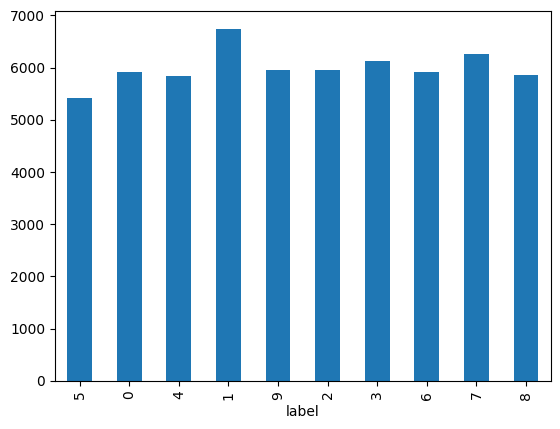

In [7]:
y_train.value_counts(sort=False).plot.bar()

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_digits(X, Y):
    for i in range(len(X)):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [10]:
def plot_predictions(X, y_pred, n, r):
    for i in range(len(X)):
        plt.subplot(n, r*2, 2*i + 1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.subplot(n, r*2, 2*i + 2)
        plt.bar(range(10), y_pred[i]*100)
    plt.show()

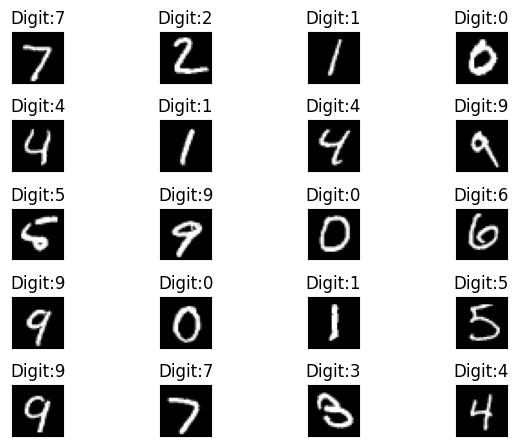

In [11]:
plot_digits(X_test.iloc[:20].values, y_test.iloc[:20].values)

In [12]:
X_train = X_train.values / 255.
X_test = X_test.values / 255.

In [13]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [14]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [15]:
import numpy as np

In [16]:
X_train_32 = np.zeros((X_train.shape[0], 32, 32))
X_test_32 = np.zeros((X_test.shape[0], 32, 32))
for i in range(len(X_train)):
    X_train_32[i] = np.pad(X_train[i].reshape(28,28), 2, mode='constant', constant_values=(0,0))
for i in range(len(X_test)):
    X_test_32[i] = np.pad(X_test[i].reshape(28,28), 2, mode='constant', constant_values=(0,0))

# Keras


In [17]:
import tensorflow as tf

In [18]:
input_layer = tf.keras.layers.Input(shape=X_train.shape[1:])
x = tf.keras.layers.Conv2D(
    filters=6,
    kernel_size=(5,5),
    padding="same",
    activation="tanh"
)(input_layer)
x = tf.keras.layers.AveragePooling2D(
    pool_size=(2,2),
    # strides=(2,2),
    padding="same",
)(x)
x = tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=(5,5),
    padding="valid",
    activation="tanh"
)(x)
x = tf.keras.layers.AveragePooling2D(
    pool_size=(2,2),
    # strides=(2,2),
    padding="same",
)(x)
x = tf.keras.layers.Conv2D(
    filters=120,
    kernel_size=(5,5),
    padding="valid",
    activation="tanh"
)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(
    units=84,
    activation='tanh',
    use_bias=True,
    bias_initializer="zeros",
)(x)
x = tf.keras.layers.Dense(
    units=10,
    activation='softmax',
    use_bias=True,
    bias_initializer="zeros",
)(x)

In [19]:
model = tf.keras.Model(inputs=input_layer, outputs=x)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120 

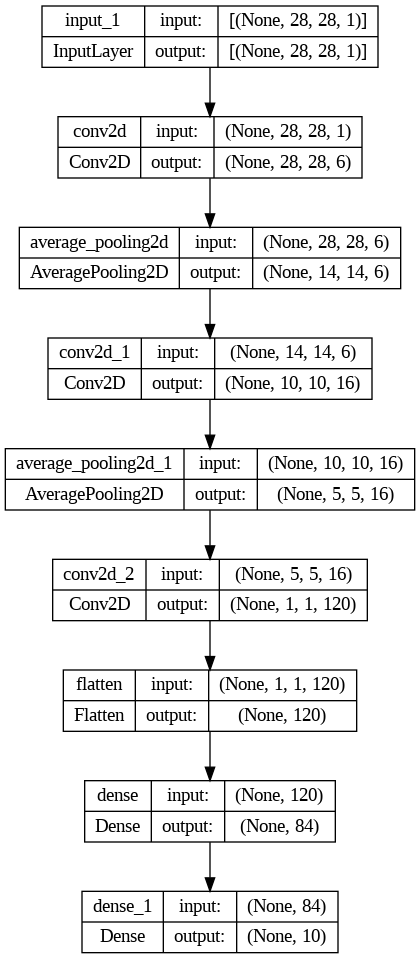

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=[
        tf.keras.metrics.MSE,
        tf.keras.metrics.CategoricalAccuracy()
    ],
)

In [23]:
model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=None,
    verbose=1,
)

313/313 [==============================] - 4s 3ms/step - loss: 2.3114 - mean_squared_error: 0.0902 - categorical_accuracy: 0.0957


[2.3113629817962646, 0.09017078578472137, 0.09570000320672989]

In [24]:
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=None,
    epochs=30,
    shuffle=True,
)

Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2783 - mean_squared_error: 0.0125 - categorical_accuracy: 0.9179
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1039 - mean_squared_error: 0.0048 - categorical_accuracy: 0.9687
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0685 - mean_squared_error: 0.0032 - categorical_accuracy: 0.9794
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0512 - mean_squared_error: 0.0024 - categorical_accuracy: 0.9846
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0404 - mean_squared_error: 0.0019 - categorical_accuracy: 0.9874
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0336 - mean_squared_error: 0.0016 - categorical_accuracy: 0.9898
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0274 - mean_squared_error: 0.0014 - categorical_accuracy: 0.991

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

for k in history.history.keys():
    plt.plot(history.history[k])
plt.legend(history.history.keys(), loc='upper left')

In [ ]:
plot_predictions(X_test[200:202], model.predict(X_test[200:202]), 2, 1)